In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from typing import Tuple

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")

def cscale(rgba: Tuple[float, float, float, float], m: float) -> Tuple[float, float, float, float]:
    return (rgba[0] * m, rgba[1] * m, rgba[2] * m, rgba[3])


def cmap_extreme(map: colors.Colormap) -> colors.Colormap:
    class Wrap(colors.Colormap):
        def __init__(self, cmap: colors.Colormap):
            self.cmap = cmap
        def __getattr__(self, name):
            if name == "cmap": return self.cmap
            return getattr(self.cmap, name)
        def __eq__(self, other):
            self.cmap.__eq__(other)
        def __copy__(self):
            Wrap(self.cmap.__copy__())
        def __call__(self, X, alpha=None, bytes=False):
            if isinstance(X, float):
                if X <= 0:
                    return self.cmap(X - 1.0, alpha, bytes)
                if X >= 1.0:
                    return self.cmap(X + 1.0, alpha, bytes)
            return self.cmap(X, alpha, bytes)
    
    return Wrap(map.with_extremes(
        under=cscale(map(-1.0), 0.5), over=cscale(map(2.0), 0.5)))


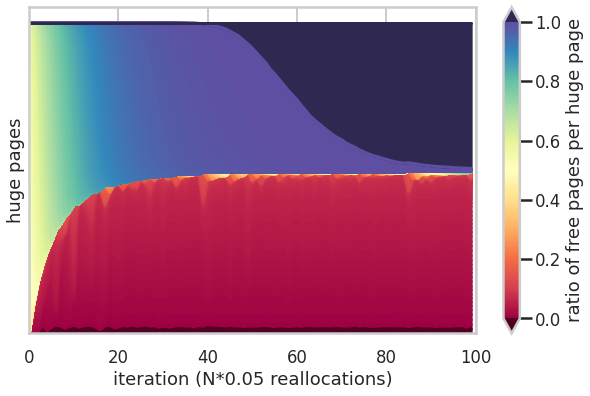

In [2]:
data = pd.read_csv("out/frag.csv", index_col=["i"])
buckets = data.columns[2:]
data = data[[*buckets]]
fix, ax = plt.subplots()
fix.set_figwidth(10)
fix.set_figheight(6)
fix.set_facecolor("white")

cmap = cmap_extreme(sns.color_palette("Spectral", as_cmap=True, n_colors=10))

data.plot.area(ax=ax, xlim=(0, 100), xlabel="iteration (N*0.05 reallocations)",
               ylabel="huge pages", yticks=[], legend=False, colormap=cmap)
plt.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax, extend="both",
             label="ratio of free pages per huge page")


- TODO: Prozentual wie viel freier Speicher sind vollständige 2M seiten